# Plot embedded IDs

In [17]:
from electricity.model import TCN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import torch
import numpy as np

In [18]:
MODEL_PATH = "Z:\TCN_clone\TCN\electricity\models\ce17bfb7d3594816a20faa55795a8084.pt"

In [19]:
args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))

model = TCN(
    num_layers=args.num_layers,
    in_channels=1,
    out_channels=1,
    residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
    kernel_size=args.kernel_size,
    bias=args.bias,
    dropout=args.dropout,
    stride=1,
    leveledinit=args.leveledinit,
    embedding_dim=args.embedding_dim,
    embed=args.embed,
)
model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
model.eval()

TCN(
  (tcn): TemporalConvolutionalNetwork(
    (net): Sequential(
      (0): ResidualBlock(
        (dcc1): DilatedCausalConv(1, 32, kernel_size=(7,), stride=(1,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,))
        (drop2): Dropout(p=0.2, inplace=False)
        (res_conv): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
      )
      (1): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(2,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(2,))
        (drop2): Dropout(p=0.2, inplace=False)
      )
      (2): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(4,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(4,))
        (drop2): Dropout(p=0.2, inplace=Fa

In [22]:
ids = [i for i in range(370)]
embds = model.embedding(torch.LongTensor(ids)).detach().cpu().numpy()

In [23]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(embds)

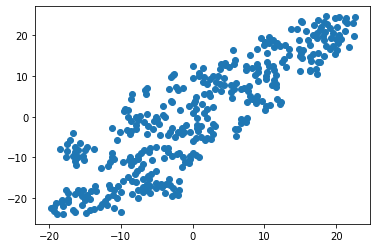

In [25]:
plt.scatter(X[:,0], X[:,1])